In [ ]:
from ase.io import read
from ase.visualize.plot import plot_atoms
from abtem import Potential
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append('../')
from DM1dCalc.multislice import multislice, multislice_1d

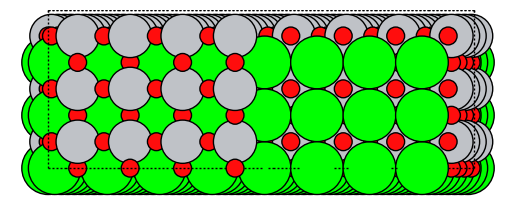

In [2]:
sto_3bc = read('../structures/STO3bc.cif')
sto_3bc = sto_3bc.repeat((1, 3, 1))
plot_atoms(sto_3bc, rotation=('0x, 0y, 0z'), show_unit_cell=True)
plt.axis("off")
plt.show()

In [3]:
energy = 200e3  # in eV
sampling = 0.065  # in Angstrom

potential = Potential(
    sto_3bc,
    sampling=sampling,
    slice_thickness=1,
    projection="finite"
).build().array

In [4]:
# Example usage
ew_check = multislice(np.array(potential),
                      energy=energy,
                      sampling=sampling,
                      slice_thickness=1,
                      device='cpu')

100%|██████████| 32/32 [00:00<00:00, 739.47it/s]


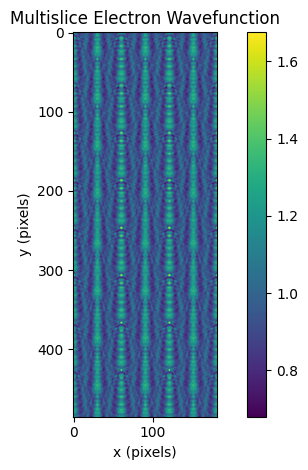

In [5]:
plt.imshow(np.abs(ew_check))
plt.colorbar()
plt.title('Multislice Electron Wavefunction')
plt.xlabel('x (pixels)')
plt.ylabel('y (pixels)')
plt.tight_layout()
plt.show()

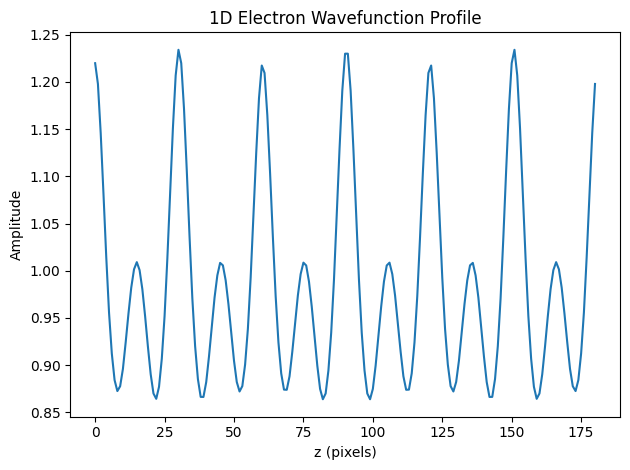

In [69]:
ew_profile_1 = np.mean(ew_check, axis=0)
plt.plot(np.abs(ew_profile_1.T))
plt.title('1D Electron Wavefunction Profile')
plt.xlabel('z (pixels)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

One dimensional validity

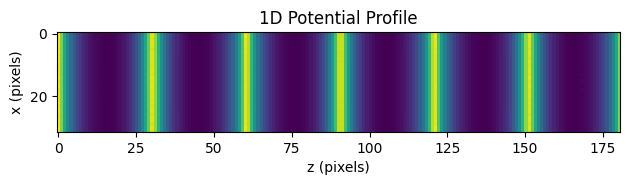

In [55]:
potential = np.array(potential)
height, width, depth = potential.shape
potential_1d = np.mean(potential, axis=1)
plt.imshow(potential_1d)
plt.title('1D Potential Profile')
plt.xlabel('z (pixels)')
plt.ylabel('x (pixels)')
plt.tight_layout()
plt.show()

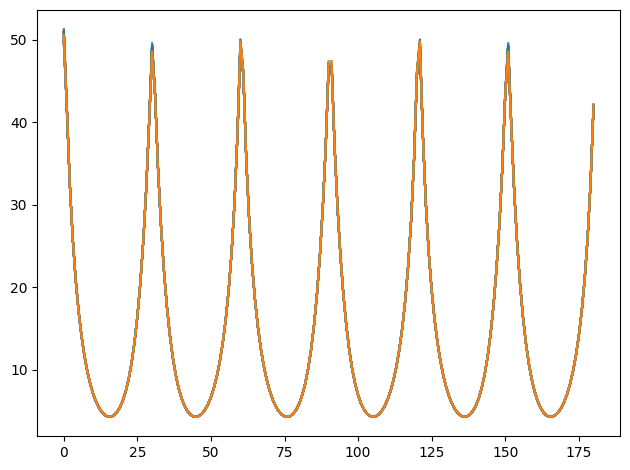

In [56]:
plt.plot(potential_1d.T)
plt.tight_layout()
plt.show()

In [66]:
# Example usage
ew_check2 = multislice_1d(np.array(potential_1d),
                          energy=energy,
                          sampling=sampling,
                          slice_thickness=1,
                          device='cpu')

100%|██████████| 32/32 [00:00<00:00, 6356.81it/s]


In [67]:
potential_1d.shape

torch.Size([32, 181])

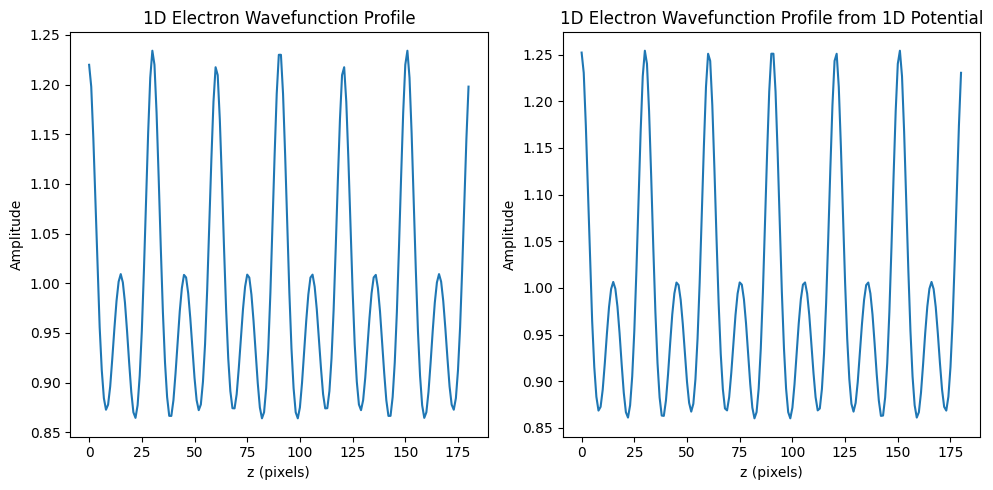

In [70]:
ew_profile_2 = ew_check2.ravel()
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(np.abs(ew_profile_1.T))
plt.title('1D Electron Wavefunction Profile')
plt.xlabel('z (pixels)')
plt.ylabel('Amplitude')
plt.subplot(1, 2, 2)
plt.plot(np.abs(ew_profile_2))
plt.title('1D Electron Wavefunction Profile from 1D Potential')
plt.xlabel('z (pixels)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()